A comparison between the initial behaviours of the original and the new implementation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import jax.numpy as jnp
import jax

import slimpletic as st

In [2]:
jax.config.read('jax_enable_x64')

True

Here we setup the parameters for the system.

In [3]:
m = 1.0
k = 1.0
ll = 1e-4 * np.sqrt(m * k)  # ll is $\lambda$ in the paper

Then the simulation parameters.

In [30]:
dt = 0.1 * np.sqrt(m / k)
t_sample_count = 1000
tmax = t_sample_count * np.sqrt(m / k)
t0 = 0
t = t0 + dt * np.arange(0, t_sample_count + 1)
r = 0

Now the system dynamics

In [31]:
def lagrangian_f(q, qdot, t):
    return 0.5 * m * jnp.dot(qdot, qdot) - 0.5 * k * jnp.dot(q, q) ** 2

In [32]:
from sympy import Symbol
from original import slimplectic

dho = slimplectic.GalerkinGaussLobatto('t', ['q'], ['v'])
L = 0.5 * m * np.dot(dho.v, dho.v) - 0.5 * k * np.dot(dho.q, dho.q)
# DHO:
K = -ll * np.dot(dho.vp, dho.qm)
# No damping:
K_nd = Symbol('a')
dho.discretize(L, K_nd, r, method='implicit', verbose=False)

Now with some initial data

In [33]:
q0 = [1.]
pi0 = [0.25 * dt * k]

We get started integrating

In [35]:
o_results = dho.integrate(q0, pi0, t)
o_nr = np.vstack(
    [
        np.array(o_results[0]),
        np.array(o_results[1])
    ],
).T
o_nr

pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-1.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [1.0, 0.9975, 0.025, 0.0, 0.1]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-1.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [0.9975, 0.9850250000000002, -0.07487499999999947, 0.1, 0.1]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-1.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [0.9850250000000002, 0.9626997500000003, -0.17400124999999902, 0.2, 0.1]
pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-1.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^

array([[ 1.        ,  0.025     ],
       [ 0.9975    , -0.074875  ],
       [ 0.985025  , -0.17400125],
       ...,
       [ 0.7557488 ,  0.65452016],
       [ 0.81742207,  0.57586162],
       [ 0.87092112,  0.49144446]])

In [36]:
*st_results, debug_info = st.iterate(
    lagrangian=lagrangian_f,
    q0=jnp.array(q0),
    pi0=jnp.array(pi0),
    dt=dt,
    t0=0,
    t_sample_count=t_sample_count,
    r=r,
    debug=True
)

st_nr = np.vstack(
    [
        np.array(st_results[0]),
        np.array(st_results[1])
    ],
).T
st_nr

qi_values [[1.00374847]
 [0.9961356 ]]
pi_current [0.025] pi_next [-0.17497392]
qi_values [[1.00982311]
 [0.98202812]]
pi_current [0.025] pi_next [-0.37265464]
qi_values [[1.00539412]
 [0.95796596]]
pi_current [0.025] pi_next [-0.56219404]
qi_values [[0.99047395]
 [0.92453762]]
pi_current [0.025] pi_next [-0.73839005]
qi_values [[0.96541815]
 [0.88258114]]
pi_current [0.025] pi_next [-0.89711874]
qi_values [[0.93089242]
 [0.83311379]]
pi_current [0.025] pi_next [-1.03561086]
qi_values [[0.88781161]
 [0.77725271]]
pi_current [0.025] pi_next [-1.15254454]
qi_values [[0.83726067]
 [0.71613698]]
pi_current [0.025] pi_next [-1.24796421]
qi_values [[0.78040946]
 [0.65086004]]
pi_current [0.025] pi_next [-1.32306584]
qi_values [[0.71843244]
 [0.5824177 ]]
pi_current [0.025] pi_next [-1.37990359]
qi_values [[0.65244152]
 [0.51167385]]
pi_current [0.025] pi_next [-1.42107286]
qi_values [[0.5834364]
 [0.4393431]]
pi_current [0.025] pi_next [-1.44941322]
qi_values [[0.5122735 ]
 [0.36598785]]
pi_

array([[ 1.00000000e+00,  2.50000000e-02],
       [ 9.96135596e-01, -1.74973915e-01],
       [ 9.82028120e-01, -3.72654643e-01],
       ...,
       [-2.02257071e+00, -3.94358593e+01],
       [-4.12819475e+00, -3.23999634e+01],
       [-6.09939068e+00, -6.48870024e+00]])

In [37]:
st_nr - o_nr

array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.36440420e-03, -1.00098915e-01],
       [-2.99687972e-03, -1.98653393e-01],
       ...,
       [-2.77831951e+00, -4.00903795e+01],
       [-4.94561682e+00, -3.29758250e+01],
       [-6.97031181e+00, -6.98014470e+00]])

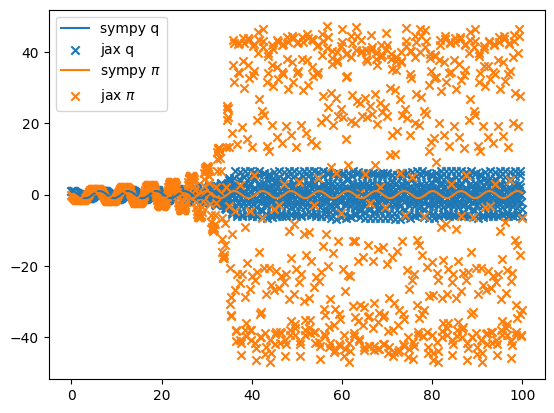

In [38]:
plt.plot(t, o_nr[:, 0], label='sympy q', color='C0')
plt.scatter(t, st_nr[:, 0], label='jax q', color='C0', marker='x')
plt.plot(t, o_nr[:, 1], label='sympy $\pi$', color='C1', )
plt.scatter(t, st_nr[:, 1], label='jax $\pi$', color='C1', marker='x')
plt.legend()

In [47]:
dho._pi_np1_map(
    np.array([2, 1]),
    np.array([3]),
    np.array([-3]),
    t0,
    dt
)

pi_np1_func: pi_np1_vec = [0.5*h_{GGL}*(-1.0*{q^{[n+1]}} + 0.5*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}**2) + 0.25*(2*{q^{[n+1]}} - 2.0*{q^{[n]}})/h_{GGL}] in context [{q^{[n]}}, {q^{[n+1]}}, \pi_q^{[n]}, t, h_{GGL}] = [3, 2, -3, 0, 0.1]


array([-10.1])

In [48]:
debug_info['compute_pi_next'](
    jnp.array([3, 2.0]),
    t0
)

Array(-10.8, dtype=float64)

And here is where we leave this mess:

- Why are these numbers different, they seem much closer though. Do a random spot test to check for rough coincidence.
- Why does the sympy version seem to be assigning the wrong values to the wrong variables?
- Verify `Convert_EOM_Args` does what I think it does 

In [54]:
jax.grad(debug_info['lagrangian_d'], argnums=0)(
    jnp.array([0.1, 0]),
    t0
)

Array([ 0.9999, -1.    ], dtype=float64)